- 정밀도(Precision) : 양성이라고 대답한 전체 케이스에 대한 TP의 비율
- $Precision = \frac{TP}{TP + FP}$
- 재현률(Recall) : 실제값이 양성인 데이터의 전체 개수에 대해서 TP의 비율
- $Recall = \frac{TP}{TP + FN}$

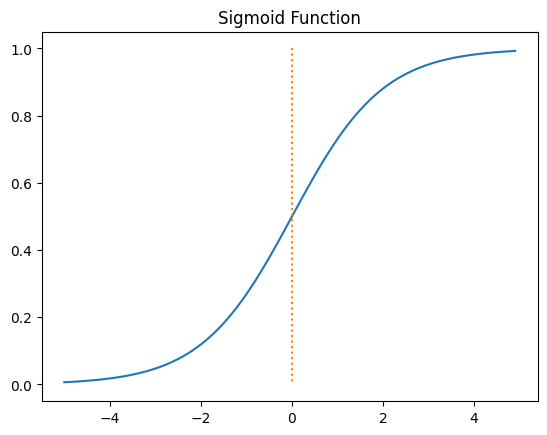

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

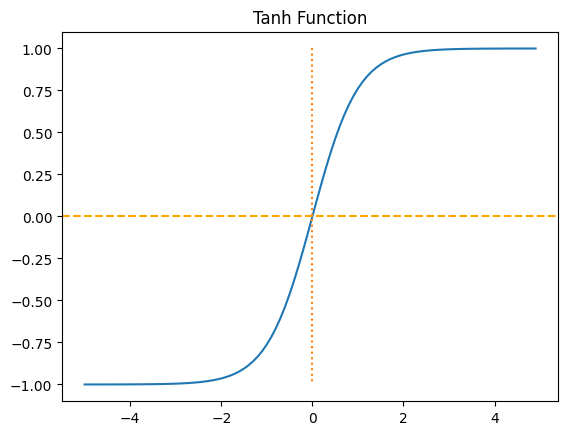

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, -1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

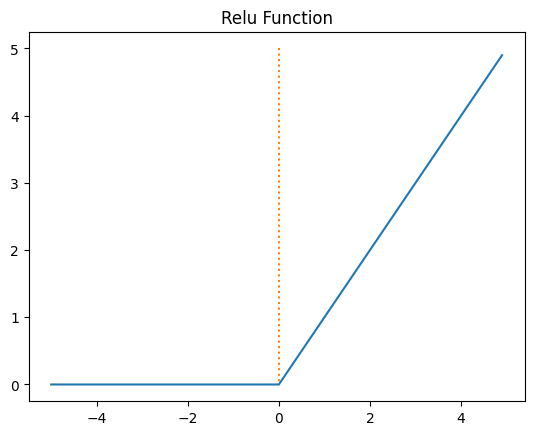

In [ ]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('Relu Function')
plt.show()

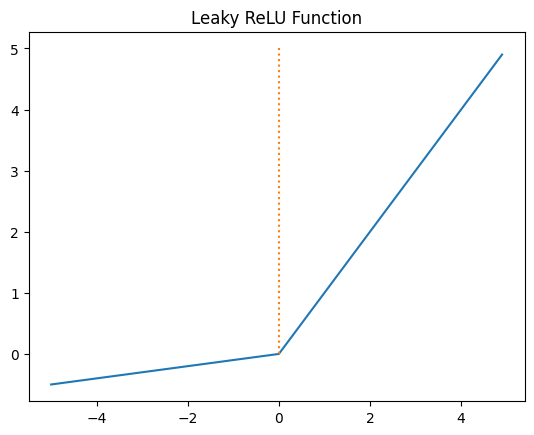

In [ ]:
a = 0.1
def leaky_relu(x):
  return np.maximum(a * x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0], [5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

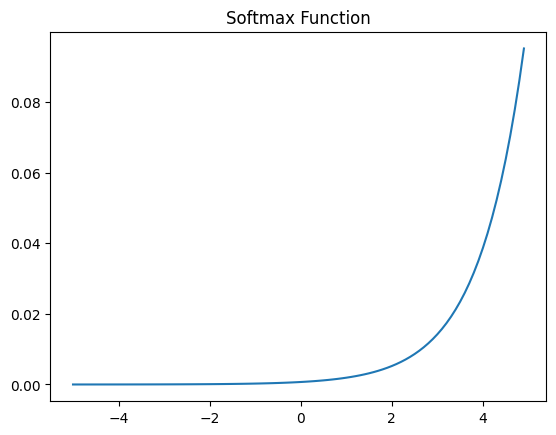

In [ ]:
# 소프트맥스 함수
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

In [ ]:
def AND_gate(x1, x2):
  w1 = 0.5
  w2 = 0.5
  b = -0.7
  result = x1*w1 + x2*w2 + b
  if result <= 0:
    return 0
  else:
    return 1

AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [ ]:
def NAND_gate(x1, x2):
  w1 = -0.5
  w2 = -0.5
  b = 0.7
  result = x1*w1 + x2*w2 + b
  if result <= 0:
    return 0
  else:
    return 1

NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

In [ ]:
def OR_gate(x1, x2):
  w1 = 0.6
  w2 = 0.6
  b = -0.5
  result = x1*w1 + x2*w2 + b
  if result <= 0:
    return 0
  else:
    return 1

OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

In [ ]:
def XOR(x1, x2):
  s1 = NAND_gate(x1, x2)
  s2 = OR_gate(x1, x2)
  result = AND_gate(s1, s2)
  if result <= 0:
    return 0
  else:
    return 1

XOR(0, 0), XOR(0, 1), XOR(1, 0), XOR(1, 1)

(0, 1, 1, 0)

In [ ]:
# 파이토치로 단층 퍼셉트 구현하기
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

# 단층 퍼셉트론을 이용한 XOR 문제 풀기
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

# 비용함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(10001):
  optimizer.zero_grad()
  hypothesis = model(X)

  # 비용 함수
  cost = criterion(hypothesis, Y)

  # cost로 H(x) 개선
  cost.backward()
  optimizer.step()

  if step % 100 == 0:
    print(step, cost.item())

0 0.7273973822593689
100 0.6931475400924683
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [ ]:
# 학습된 단층 퍼셉트론의 예측값 확인하기
with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == Y).float().mean()
  # PyTorch 텐서를 Numpy 배열로 변환하여 출력하기 전에 계산 그래프에서 분리하고 CPU로 옮김
  print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
  print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
  print('실제값(Y): ', Y.cpu().numpy())
  print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


In [ ]:
# 파이토치로 다층 퍼셉트론 구현하기
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

model = nn.Sequential(
    nn.Linear(2, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),
    nn.Sigmoid()
).to(device)

criterion = nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for epoch in range(10001):
  optimizer.zero_grad()
  # forward 연산
  hypothesis = model(X)

  # 비용 함수
  cost = criterion(hypothesis, Y)
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(epoch, cost.item())

0 0.7408947944641113
100 0.6931389570236206
200 0.6931374073028564
300 0.6931357383728027
400 0.6931341886520386
500 0.6931324601173401
600 0.693130612373352
700 0.6931287050247192
800 0.6931267380714417
900 0.6931246519088745
1000 0.6931224465370178
1100 0.693120002746582
1200 0.6931174993515015
1300 0.6931147575378418
1400 0.693111777305603
1500 0.6931086182594299
1600 0.693105161190033
1700 0.6931012868881226
1800 0.6930969953536987
1900 0.6930923461914062
2000 0.693087100982666
2100 0.693081259727478
2200 0.693074643611908
2300 0.693067193031311
2400 0.6930586099624634
2500 0.6930487155914307
2600 0.693037211894989
2700 0.6930238008499146
2800 0.6930078268051147
2900 0.6929886937141418
3000 0.6929654479026794
3100 0.6929367780685425
3200 0.6929006576538086
3300 0.6928542852401733
3400 0.6927931904792786
3500 0.692710280418396
3600 0.692592978477478
3700 0.6924186944961548
3800 0.6921423673629761
3900 0.6916618347167969
4000 0.6907041072845459
4100 0.6883158087730408
4200 0.67906117

In [ ]:
# 학습된 다층 퍼셉트론의 예측값 확인하기
with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == Y).float().mean()
  print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
  print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
  print('실제값(Y): ', Y.cpu().numpy())
  print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1169227e-04]
 [9.9982882e-01]
 [9.9984241e-01]
 [1.8534942e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


# 다층 퍼셉트론으로 손글씨 분류하기

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits() # 1979개의 이미지 데이터 로드

print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
print(digits.target[0])

0


In [ ]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


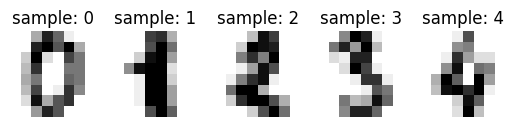

In [ ]:
# 상위 5개의 샘플만 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
  # 5개의 샘플만 출력
  plt.subplot(2, 5, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('sample: %i' % label)

In [ ]:
for i in range(5):
  print(i, '번 인덱스 샘플의 레이블 : ', digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [ ]:
# digits.data는 64차원의 벡터를 반환
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [ ]:
# 다층 퍼셉트론 분류기 만들기
import torch
import torch.nn as nn
from torch import optim

# 모델 정의: 순차적인 레이어 구조
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

# 입력 데이터 X와 레이블 Y를 텐서로 변환
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

# 손실 함수
loss_fn = nn.CrossEntropyLoss()

# 옵티마이저
optimizer = optim.Adam(model.parameters())

losses = []

# 총 100번의 에포크 동안 모델 학습
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  # 10번째 에포크마다 현재 에포크와 손실 값 출력
  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, 100, loss.item()
    ))
  losses.append(loss.item())

Epoch    0/100 Cost: 2.622834
Epoch   10/100 Cost: 2.115057
Epoch   20/100 Cost: 1.828927
Epoch   30/100 Cost: 1.532055
Epoch   40/100 Cost: 1.224369
Epoch   50/100 Cost: 0.935326
Epoch   60/100 Cost: 0.695006
Epoch   70/100 Cost: 0.503801
Epoch   80/100 Cost: 0.367306
Epoch   90/100 Cost: 0.279984


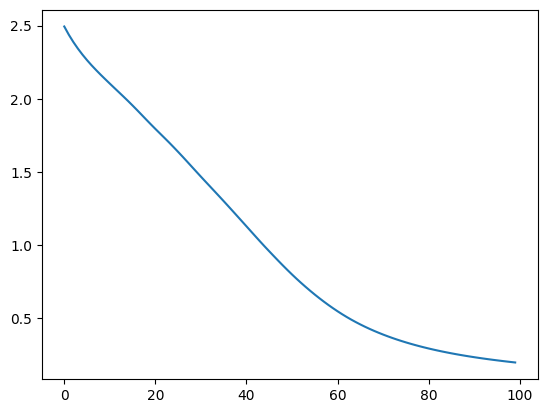

In [ ]:
plt.plot(losses)

# 다층 퍼셉트론으로 MNIST 분류하기
## fetch_openml 다운로드 오류가 있어 해결되면 재실행 예정

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml
# cache=True는 다운로드한 데이터를 로컬 디스크에 저장하여 다음 호출 때 빠르게 로드
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist = fetch_openml('mnist_784', cache=True, data_home='./dataset', as_frame=False)
mnist.data[0]

KeyboardInterrupt: 

In [ ]:
print(mnist.target[0])

In [ ]:
# 레이블 데이터 타입을 정수형으로 변환
mnist.target = mnist.target.astype(np.int8)

X = mnist.data / 255 # 0~255값을 [0, 1] 구간으로 정규화
y = mnist.target

print(X[0])
print(y[0])

In [ ]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print('이 이미지 데이터의 레이블은 {:.0f}이다.'.format(y[0]))

In [ ]:
# 훈련 데이터와 테스트 데이터의 분리
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# 데이터를 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

# 텐서로 변환
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# TensorDataset 객체 생성
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

# DataLoader 객체 생성
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [ ]:
# 다층 퍼셉트론
from torch import nn
from torch import optim

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()
# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 총 3번의 에포크 동안 모델 학습
epochs = 3

for epoch in range(epochs):
  for data, targets in loader_train:
    optimizer.zero_grad()
    y_pred = model(data)
    loss = loss_fn(y_pred, targets)
    loss.backward()
    optimizer.step()

  print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch + 1, 3, loss.item()))

In [ ]:
# 모델 내의 일부 계층들이 학습과 추론 시 다르게 동작할 수 있기 때문에 필요한 설정임
# dropout, batchnormalization등을 비활성화 시
model.eval() # 신경망을 추론 모드로 전환
correct = 0

# 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
with torch.no_grad():
  for data, targets, in loader_test:
    outputs = model(data)

    # 추론 계산
    _, predicted = torch.max(outputs.data, 1) # 확률이 가장 높은 레이블이 무엇인지 계산
    correct += predicted.eq(targets.data.view_as(predicted)).sum() # 정답과 일치한 경우 정답 카운트를 증가

# 정확도 출력
data_num = len(loader_test.dataset) # 데이터 총 건수
print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n',format(correct, data_num, 100. * correct / data_num))



In [ ]:
index = 2018

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print('예측 결괴 : {}'.format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print('이 이미지 데이터의 정답 레이블은 {:.0f}입니다.'.format(y_test[index]))

In [ ]:
# L2 규제
class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

model = Architecture1(10, 20, 2)
# 옵티마이저의 weight_decay 매개변수를 설정하므로서 L2 규제 적
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

# 기울기 소실 문제
## 기울기 소실을 막는 방법
- 1. ReLU와 ReLU의 변형 사용
- 2. 가중치 초기화 방법 선택
  - 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도 함.
  - 가중치 초기화만 적절히 해줘도 기울기 소실 문제와 같은 문제를 완화시킬 수 있음.
  - 1. 세이비어 초기화(Xavier Initialization)
    - 균등 분포를 사용하여 가중치를 초기화하는 경우의 범위
    - $\( W \sim \text{Uniform}\left(-\sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}}, +\sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}} \right) \)$
    - 정규 분포로 초기화할 경우에는 평균이 0이고, 표준 편차 σ가 다음을 만족하도록 한다.
    - $\( \sigma = \sqrt{\frac{2}{n_{\text{in}} + n_{\text{out}}}} \)$
    - 세이비어 초기화는 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이뒤쳐지는 것을 막음.
    - 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능을 보이지만, ReLU와 함께 사용할 경우에는 성능이 좋지 않음.
  - He 초기화(He initialization)
    - ReLU와 그 변형 함수들을 활성화 함수로 사용할 경우에 사용하는 초기화 방법
    - He 초기화는 다음 층의 뉴런의 수를 반영하지 않음.
    - 균등 분포로 초기화 할 경우의 분포 범위
    - $\( W \sim \text{Uniform}\left(-\sqrt{\frac{6}{n_{\text{in}}}}, +\sqrt{\frac{6}{n_{\text{in}}}} \right) \)$
    - 정규 분포로 초기화할 경우에는 표준 편차 σ가 다음을 만족하도록 한다.
    - $\( \sigma = \sqrt{\frac{2}{n_{\text{in}}}} \)$
  - 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용할 경우에는 세이비어 초기화 방법이 효율적이다.
  - ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적이다.
  - ReLU + He 초기화 방법이 좀 더 보편적이다.

$---------------------------------------------$
- 3. 배치 정규화
  - 기울기 소실이나 폭주를 예방하는 다른 방법
  - 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만든다.
  - 1) 내부 공변량 변화(Internal Covariate Shift)
    - 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상
    - 이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생한다.
      - 공변량 변화는 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우를 의미한다.
      - 내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미한다.
  - 2) 배치 정규화(Batch Normalization)
    - 한 번에 들어오는 배치 단위로 정규화하는 것을 말한다.
    - 각 층에서 활성화 함수를 통과하기 전에 수행됨.
    - 입력에 대해 평균을 0으로 만들고, 정규화를 한다.
    - 정규화 된 데이터에 대해서 스케일과 시프트를 수행한다.
    - 두 개의 매개변수 γ와 β를 사용하는데, γ는 스케일을 위해 사용되고, β는 시프트를 하는 것에 사용하며 다음 레이어에 일정한 범위의 값들만 전달되게 한다.
    - Input : 미니배치 $B = {x^{(1)}, x^{(2)}, ..., x^{(m)}}$
    - Output : $y^{(i)} = BN_{γ,β}(x^{(i)})$
    - $μ_B ← \frac{1}{m}∑_i^mx^{(i)}$ # 미니 배치에 대한 평균
    - $σ_B^2 ←\frac{1}{m}∑_i^m(x^{(i)} - μ_B)^2$ # 미니 배치에 대한 분산
    - $x̂^{(i)} ← \frac{x^{(i)} - μ_B}{\sqrt{σ_B^2+ϵ}}$ # 정규화
    - $y^{(i)} ← γx̂^{(i)} + Β = BN_{γ,Β}(x^{(i)})$ # 스케일 조정과 시프트
      - m은 미니 배치에 있는 샘플의 수
      - $μ_B$는 미니 배치 B에 대한 평균
      - $σ_B$는 미니 배치 B에 대한 표준편차
      - $x̂^{(i)}은 평균이 0이고 정규화 된 입력 데이터
      - $ϵ$은 분모가 0이 되는 것을 막는 작은 수. 보편적으로 $10^{-5}$
      - $γ$는 정규화 된 데이터에 대한 스케일 매개변수로 학습 대상
      - $β$는 정규화 된 데이터에 대한 시프트 매개변수로 학습 대상
      - $y^{(i)}$는 스케일과 시프트를 통해 조정한 BN의 최종 결과
    - 배치 정규화는 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장해놓았다가 테스트 할 때는 해당 배치의 평균과 분산을 구하지 않고 구해놓았던 평균과 분산으로 정규화를 한다.
      - 배치 정규화를 사용하면시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선된다.
      - 가중치 초기화에 훨씬 덜 민감해진다.
      - 훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선시킨다.
      - 미니 배치마다 평균과 표준편차를 계산하므로 훈련 데이터에 일종의 잡음을 넣는 부수 효과로 과적합을 방지하는 효과를 낸다. 하지만 부수적 효과이므로드롭 아웃과 함께 사용하는 것이 좋음.
      - 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려진다. 그래서 서비스 속도를 고려하는 관점에서는 배치 정규화가 꼭 필요한지 고민이 필요한다.
  - 3) 배치 정규화의 한계
    1. 첫째, 미니 배치 크기에 의존적임
      배치 정규화는 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있다. 단적으로 배치 크기를 1로 하게되면 분산은 0이 된다.작은 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용되어 훈련에 악영향을 줄 수 있다. 배치 정규화를 적용할때는 작은 미니 배치보다는 크기가 어느정도 되는 미니 배치에서 하는 것이 좋다.
    2. 둘째, RNN에 적용하기 어려움
      RNN은 각 시점마다 다른 통계치를 가진다. 이는 RNN에 배치 정규화를 적용하는 것을 어렵게 만든다.

- 4. 층 정규화
  - 배치 정규화는 특성별로 평균과 표준편차를 계산해서 정규화를 수행한다.
  - 층 정규화는 샘플별로 평균과 표준편차를 계산해서 정규화를 수행한다.